# EDA on vehicle insurance customer data

In [46]:


'''



A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

1. Add the column names to both datasets:

i. Column Name for customer details table:

           customer_id, 

           Gender,

           age, 

           driving licence present,

           region code, 

           previously insured, 

           vehicle age 

           and vehicle damage, in respective order. 

ii. Column Name for customer_policy table:

           customer_id, 

           annual premium (in Rs), 

           sales channel code, 

           vintage and response. 

2. Checking and Cleaning Data Quality:

i. Null values

Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.
ii. Outliers

Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 
(Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

Hint2: For getting percentile value, explore pd.describe() function)

iii. White spaces

Remove white spaces
iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 

for future modeling use if required
vi. Drop Duplicates (duplicated rows)

3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

 i. Gender wise average annual premium

ii. Age wise average annual premium

iii. Is your data balanced between the genders?

          (Hint: Data is balanced if number of counts in each group is approximately same)

iv. Vehicle age wise average annual premium.

5. Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables). 

Correlation coefficient < -0.5           - Strong negative relationship

Correlation coefficient > 0.5            -  Strong positive relationship

0.5 < Correlation coefficient < 0.5   - There is no relationship. 




'''





import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline


In [47]:
table1=pd.read_csv("customer_details.csv")
table1


,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [48]:
table2=pd.read_csv("customer_policy_details.csv")
table2

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


### STEP 1. Add the column names to both datasets:

In [49]:
#i. Column Name for customer details table:
table1.columns=["customer_id","Gender","age","driving licence present","region code","previously insured","vehicle age","vehicle damage"]

 
#ii. Column Name for customer_policy table:
table2.columns=["customer_id","annual premium (in Rs)","sales channel code","vintage","response"]

### STEP 2. Checking and Cleaning Data Quality:

In [50]:
#i. Null values

# Null values for customer_details
#Generate a summary of count of all the null values column wise
#Drop Null values for customer_id because central tendencies for id’s is not feasible.
#Replace all null values for numeric columns by mean. 
#Replace all null values for Categorical value by mode.

print("Null value in 'customer_id' : ",table1["customer_id"].isnull().sum())
table1=table1.dropna(subset=["customer_id"])
print("Null value in 'customer_id' after droping : ",table1["customer_id"].isnull().sum())

print("Null value in 'Gender' : ",table1["Gender"].isnull().sum())
table1["Gender"]=table1["Gender"].fillna(table1["Gender"].mode()[0])
print("Null value in 'Gender' after replacing : ",table1["Gender"].isnull().sum())

print("Null value in 'age' : ",table1["age"].isnull().sum())
table1["age"]=table1["age"].fillna(table1["age"].mean())
print("Null value in 'age' after replacing : ",table1["age"].isnull().sum())


print("Null value in 'driving licence present' : ",table1["driving licence present"].isnull().sum())
table1["driving licence present"]=table1["driving licence present"].fillna(table1["driving licence present"].mode()[0])
print("Null value in 'driving licence present' after replacing : ",table1["driving licence present"].isnull().sum())


print("Null value in 'region code' : ",table1["region code"].isnull().sum())
table1["region code"]=table1["region code"].fillna(table1["region code"].mode()[0])
print("Null value in 'region code' after replacing : ",table1["region code"].isnull().sum())

print("Null value in 'previously insured' : ",table1["previously insured"].isnull().sum())
table1["previously insured"]=table1["previously insured"].fillna(table1["previously insured"].mode()[0])
print("Null value in 'previously insured' after replacing : ",table1["previously insured"].isnull().sum())

print("Null value in 'vehicle age' : ",table1["vehicle age"].isnull().sum())
table1["vehicle age"]=table1["vehicle age"].fillna(table1["vehicle age"].mode()[0])
print("Null value in 'vehicle age' after replacing : ",table1["vehicle age"].isnull().sum())

print("Null value in 'vehicle damage' : ",table1["vehicle damage"].isnull().sum())
table1["vehicle damage"]=table1["vehicle damage"].fillna(table1["vehicle damage"].mode()[0])
print("Null value in 'vehicle damage' after replacing : ",table1["vehicle damage"].isnull().sum())


# Null values for customer_policy_detail

print("Null value in 'customer_id' : ",table2["customer_id"].isnull().sum())
table2=table2.dropna(subset=["customer_id"])
print("Null value in 'customer_id' after droping : ",table2["customer_id"].isnull().sum())

print("Null value in 'annual premium (in Rs)' : ",table2["annual premium (in Rs)"].isnull().sum())
table2["annual premium (in Rs)"]=table2["annual premium (in Rs)"].fillna(table2["annual premium (in Rs)"].mean())
print("Null value in 'annual premium (in Rs)' after replacing : ",table2["annual premium (in Rs)"].isnull().sum())

print("Null value in 'sales channel code' : ",table2["sales channel code"].isnull().sum())
table2["sales channel code"]=table2["sales channel code"].fillna(table2["sales channel code"].mode()[0])
print("Null value in 'sales channel code' after replacing : ",table2["sales channel code"].isnull().sum())

print("Null value in 'vintage' : ",table2["vintage"].isnull().sum())
table2["vintage"]=table2["vintage"].fillna(table2["vintage"].mean())
print("Null value in 'vintage' after replacing : ",table2["vintage"].isnull().sum())

print("Null value in 'response' : ",table2["response"].isnull().sum())
table2["response"]=table2["response"].fillna(table2["response"].mode()[0])
print("Null value in 'response' after replacing : ",table2["response"].isnull().sum())


Null value in 'customer_id' :  386
Null value in 'customer_id' after droping :  0
Null value in 'Gender' :  368
Null value in 'Gender' after replacing :  0
Null value in 'age' :  366
Null value in 'age' after replacing :  0
Null value in 'driving licence present' :  392
Null value in 'driving licence present' after replacing :  0
Null value in 'region code' :  391
Null value in 'region code' after replacing :  0
Null value in 'previously insured' :  381
Null value in 'previously insured' after replacing :  0
Null value in 'vehicle age' :  381
Null value in 'vehicle age' after replacing :  0
Null value in 'vehicle damage' :  406
Null value in 'vehicle damage' after replacing :  0
Null value in 'customer_id' :  387
Null value in 'customer_id' after droping :  0
Null value in 'annual premium (in Rs)' :  344
Null value in 'annual premium (in Rs)' after replacing :  0
Null value in 'sales channel code' :  400
Null value in 'sales channel code' after replacing :  0
Null value in 'vintage' : 

In [51]:
## Outliers
#ii. Outliers

#Generate a summary of count of all the outliers column wise
#Replace all outlier values for numeric columns by mean. 
#table1
table1.describe()
table2.describe()
Q1=table1.describe().loc["25%","age"]
Q3=table1.describe().loc["75%","age"]
IQR=Q3-Q1
print(table1.loc[table1["age"]<(Q1-IQR*1.5),"age"].count())
print(table1.loc[table1["age"]>(Q3+IQR*1.5),"age"].count())
# there are no outliers in 'age' column

#table2
Q1=table2.describe().loc["25%","annual premium (in Rs)"]
Q3=table2.describe().loc["75%","annual premium (in Rs)"]
IQR=Q3-Q1
print(table2.loc[table2["annual premium (in Rs)"]<(Q1-IQR*1.5),"annual premium (in Rs)"].count())
print(table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())
table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"]=table2["annual premium (in Rs)"].mean()
print(table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())
Q1=table2.describe().loc["25%","vintage"]
Q3=table2.describe().loc["75%","vintage"]
IQR=Q3-Q1
print(table2.loc[table2["vintage"]<(Q1-IQR*1.5),"vintage"].count())
print(table2.loc[table2["vintage"]>(Q3+IQR*1.5),"vintage"].count())
#there are no outliers in 'vintage' column


0
0
0
10332
0
0
0


In [52]:

table1.describe()
table2.describe()
Q1=table1.describe().loc["25%","age"]
Q3=table1.describe().loc["75%","age"]
IQR=Q3-Q1
print("The Outliers replace is : ")
print(table1.loc[table1["age"]<(Q1-IQR*1.5),"age"].count())
print(table1.loc[table1["age"]>(Q3+IQR*1.5),"age"].count())

Q1=table2.describe().loc["25%","annual premium (in Rs)"]
Q3=table2.describe().loc["75%","annual premium (in Rs)"]
IQR=Q3-Q1
print(table2.loc[table2["annual premium (in Rs)"]<(Q1-IQR*1.5),"annual premium (in Rs)"].count())
print(table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())
table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"]=table2["annual premium (in Rs)"].mean()
print(table2.loc[table2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())
Q1=table2.describe().loc["25%","vintage"]
Q3=table2.describe().loc["75%","vintage"]
IQR=Q3-Q1

print(table2.loc[table2["vintage"]<(Q1-IQR*1.5),"vintage"].count())
print(table2.loc[table2["vintage"]>(Q3+IQR*1.5),"vintage"].count())


The Outliers replace is : 
0
0
64735
2708
0
0
0


In [53]:
#White spaces
#iii. White spaces

#Remove white spaces

# 2.3.1 Remove Whitespaces for table1
table1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
 
# 2.3.2 Remove Whitespaces for table2
table2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#case correction
#iv. case correction(lower or upper, any one) 

# 2.4.1 case correction for table1
table1.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
 
# 2.4.2 case correction for table2
table2.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
 






,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [54]:
### creating dummies
#v. Convert nominal data (categorical) into dummies 
#for future modeling use if required
# 2.5.1 converting categorical data into dummy variables for table1

dummies_gender=pd.get_dummies(table1["Gender"])
dummies_d_l_p=pd.get_dummies(table1["driving licence present"])
dummies_rc=pd.get_dummies(table1["region code"])
dummies_p_i=pd.get_dummies(table1["previously insured"])
dummies_vehicle_age=pd.get_dummies(table1["vehicle age"])
dummies_vehicle_damage=pd.get_dummies(table1["vehicle damage"])

# 2.5.2 converting categorical data into dummy variables for table2
dummies_scc=pd.get_dummies(table2["sales channel code"])
dummies_vi=pd.get_dummies(table2["vintage"])
dummies_res=pd.get_dummies(table2["response"])
 
    
    
    
#vi. Drop Duplicates (duplicated rows)   
### checking for any duplicates    
# 2.6.1 dropping duplicate rows for table1
table1.drop_duplicates(inplace=True)
table1

# 2.6.2 dropping duplicate rows for table2
table2.drop_duplicates(inplace=True)
table2



,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


### STEP 3. Create a Master table for future use.(customer table + customer_policy)

In [55]:
print(table1.duplicated().sum())
print(table2.duplicated().sum())
 
master_df=pd.merge(table1,table2,on='customer_id')
master_df

0
0


,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


### STEP 4. getting information

Gender
Female    29055.342565
Male      29098.196495
Name: annual premium (in Rs), dtype: float64


Data is balanced between the two genders because the averages are approximately equal



Gender wise average annual premium:


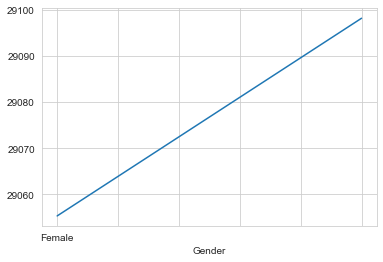

Age wise average annual premium:


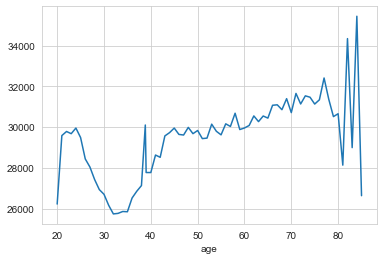

Male to Female ratio is 1.18
Generally, the standard is: 
Balanced data ratio: 1.0
Slightly balanced data ratio: 1.22-1.5 
Imbalanced data ratio: 4.0-9.0


Vehicle_age wise average annual premium:


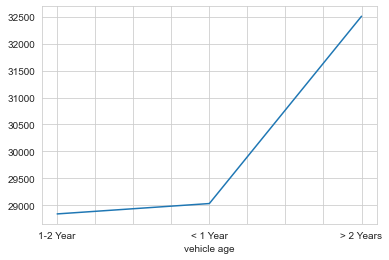

In [56]:
# STEP4: getting information

#Gender wise average annual premium 
aap_gender_df=master_df.groupby(["Gender"])["annual premium (in Rs)"].mean()
print(aap_gender_df)
print("\n")
print("Data is balanced between the two genders because the averages are approximately equal")
print("\n\n")
print("Gender wise average annual premium:")
import matplotlib.pyplot as pyplot
aap_gender_df.plot()
pyplot.show()

# age wise average annual premium 
aap_age_df=master_df.groupby(["age"])["annual premium (in Rs)"].mean()
print("Age wise average annual premium:")
#print(aap_age_df)
import matplotlib.pyplot as pyplot
aap_age_df.plot()
pyplot.show()

#Is your data balanced between the genders?
print(f"Male to Female ratio is {round(master_df['Gender'].value_counts()[0]/master_df['Gender'].value_counts()[1],2)}")
print(f"Generally, the standard is: \nBalanced data ratio: {50/50}\nSlightly balanced data ratio: {round(55/45,2)}-{60/40} \nImbalanced data ratio: {80/20}-{90/10}")
print("\n")
#data is balanced between the two genders because the averages are approximately equal

#vehicle_age wise average annual premium 
aap_v_age_df=master_df.groupby(["vehicle age"])["annual premium (in Rs)"].mean()
print("Vehicle_age wise average annual premium:")
#print(aap_v_age_df)
import matplotlib.pyplot as pyplot
aap_v_age_df.plot()
pyplot.show()
 



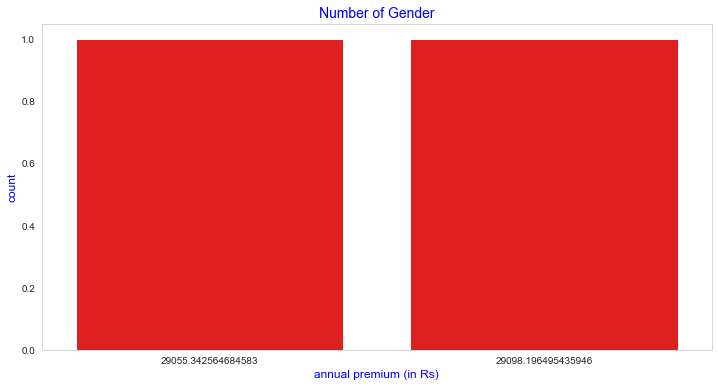

In [57]:
pyplot.figure(figsize=(12,6))
pyplot.grid(False)
pyplot.title('Number of Gender',color='blue',fontsize=14)
pyplot.xlabel('Gender',fontsize=12,color='blue')
pyplot.ylabel(None,color='blue',fontsize=12);
sns.countplot(x=aap_gender_df,color='red');

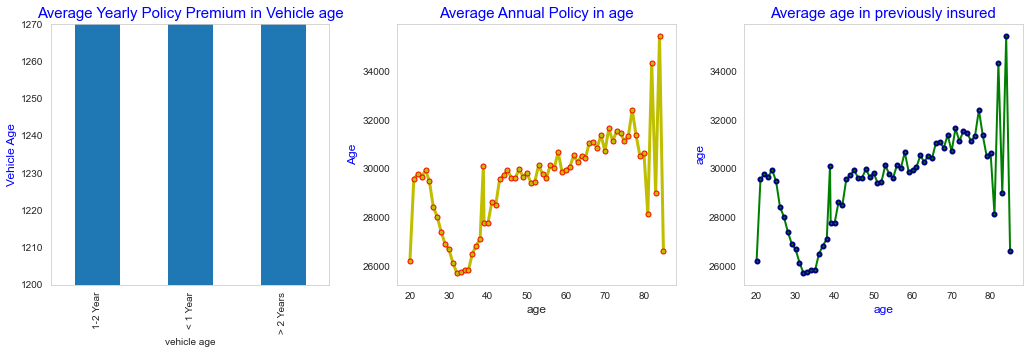

In [58]:
insurance_premium = master_df.groupby('vehicle age')['annual premium (in Rs)'].mean()
insurance_state = master_df.groupby('age')['annual premium (in Rs)'].mean()
insurance_claim = master_df.groupby('previously insured')['age'].mean()


fig,axes = pyplot.subplots(1,3,figsize=(15,5))
pyplot.tight_layout(pad=4)
sns.set_style('whitegrid')

axes[1].set_xlabel('annual premium (in Rs)',fontsize=12)
axes[0].set_ylabel('Vehicle Age',fontsize=12,color='blue')
axes[0].set_ylim([1200,1270])
axes[0].grid(False)
axes[0].set_title('Average Yearly Policy Premium in Vehicle age',fontsize=15,color='blue')
insurance_premium.plot(kind='bar',ax=axes[0],grid=False);

axes[1].set_xlabel('annual premium (in Rs)',fontsize=12)
axes[1].set_ylabel('Age',fontsize=12,color='blue')
axes[1].set_title('Average Annual Policy in age',fontsize=15,color='blue')
insurance_state.plot(kind='line',ax=axes[1],marker='.', c='y', ls='-', lw=3, ms=10,mec='red',grid=False)

axes[2].set_xlabel('previously insured',fontsize=12,color='blue')
axes[2].set_ylabel('age',fontsize=12,color='blue');
axes[2].set_title('Average age in previously insured',fontsize=15,color='blue')
insurance_state.plot(kind='line',ax=axes[2],marker='.', c='g', ls='-', lw=2, ms=8, mew=2, mec='navy',grid=False);

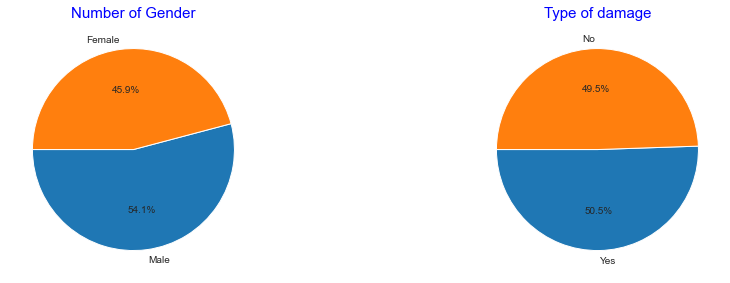

In [59]:
drive=master_df['Gender']

Vehicles_involved = drive.value_counts()
damage=master_df['vehicle damage']
Type_of_collision = damage.value_counts()



fig,axes = pyplot.subplots(1,2,figsize=(14,6))
pyplot.tight_layout(pad=8)

axes[0].set_title('Number of Gender',fontsize=15,color='blue')
axes[0].pie(Vehicles_involved,labels=Vehicles_involved.index,autopct='%1.1f%%',startangle=180)

axes[1].set_title('Type of damage',fontsize=15,color='blue')
axes[1].pie(Type_of_collision,labels=Type_of_collision.index,autopct='%1.1f%%',startangle=180);

Please wait SomeTimes for figure........


Text(1025.3362676056338, 0.5, '% of Total Gender')

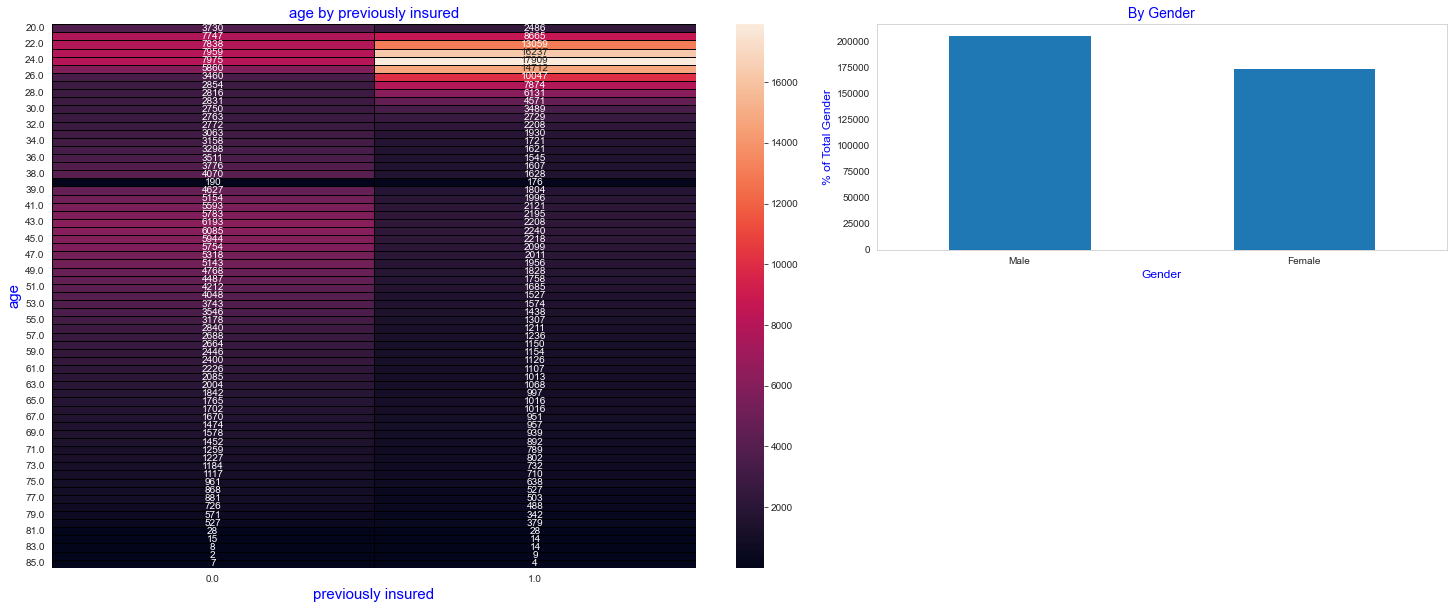

In [62]:


import matplotlib.pyplot as plt
%matplotlib inline

print("Please wait SomeTimes for figure........")
fig = plt.figure(figsize=(25, 10))
ax1 = plt.subplot2grid((7, 12), (0, 0), rowspan=7,colspan=7)
ax2 = plt.subplot2grid((7, 12), (0, 7), rowspan=3,colspan=5)

regionCode=master_df['previously insured']
Accident_witnesses = pd.crosstab(master_df.age,regionCode)
sns.heatmap(Accident_witnesses,fmt="d", annot=True,linecolor='black',linewidths=.5,ax=ax1)
ax1.set_title('age by previously insured',fontsize=15,color='blue')
ax1.set_xlabel('previously insured', fontsize=15,color='blue')
ax1.set_ylabel('age', fontsize=15,color='blue')

damage=['vehicle damage']
Authorities_contacted = master_df.Gender.value_counts()
Authorities_contacted.plot(kind='bar',grid=False,ax=ax2)
xlabels=Authorities_contacted .index
ax2.set_xticklabels(xlabels, rotation=0);
ax2.set_title('By Gender',fontsize=14,color='blue')
ax2.set_xlabel("Gender",fontsize=12,color='blue')
ax2.set_ylabel("% of Total Gender",fontsize=12,color='blue')



### STEP 5.Is there any relation between Person Age and annual premium?

In [61]:
# STEP5: Is there any relation between Person Age and annual premium?
print("Is there any relation between Person Age and annual premium?")
n =master_df['age'].corr(master_df['annual premium (in Rs)'])
if n<-0.5:
    print("Strong negative relationship")
if n>0.5:
    print("Strong positive relationship")
if n>-0.5 and n<0.5:
    print("There is no relationship!")


Is there any relation between Person Age and annual premium?
There is no relationship!
